#### 本次成绩:85

### 评卷标准:
- 分析，理顺，项目要求并落实在文档中   ？
- 比较不同结果 ，思考，改进，总结。   √ 此部分应该有更详细的说明。虽然最后都在总结 里有体现。但每一步是需要有记录和思考 的
- 成绩提交并截图成绩   ？ 没上传？
- 最终结论，报告。    √

最后的总结 很走心。。。

#### 评卷：David

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
train = pd.read_csv('train.csv.gz')
test = pd.read_csv('test.csv.gz')

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
#数据太少的列直接删除,另外Id也没什么用
#先保存ID
train_ID = train['Id']
test_ID = test['Id']
train = train.drop(['Id','Alley','LotFrontage','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1)
test = test.drop(['Id','Alley','LotFrontage','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1)

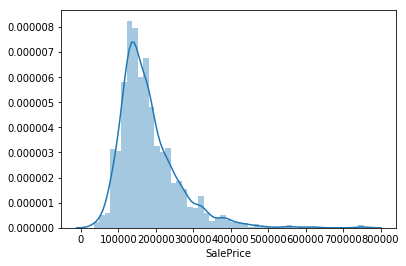

In [9]:
sns.distplot(train['SalePrice'])

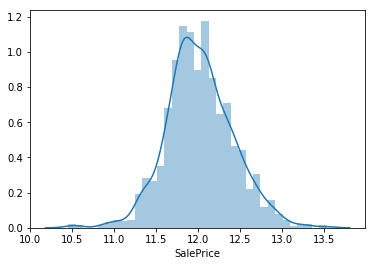

In [10]:
# 取log
train["SalePrice"] = np.log1p(train["SalePrice"])
sns.distplot(train['SalePrice'])

In [11]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 73)


In [12]:
# 把数值型列中的缺失部分用中位数填充
numeric_variables = list(all_data.select_dtypes(include=['int64', 'float64']).columns.values)
all_data[numeric_variables] = all_data[numeric_variables].apply(lambda x: x.fillna(x.median()),axis=0)

# 把object型列中的缺失部分用None表示，作为一个独特的类别
categorial_variables = list(all_data.select_dtypes(include=['object']).columns.values)
all_data[categorial_variables] = all_data[categorial_variables].apply(lambda x: x.fillna("None"),axis=0)

In [13]:
# 发现已经处理完毕
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 73 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2919 non-null object
BsmtExposure     2919 non-null object
BsmtFinSF1       2919 non-null float64
BsmtFinSF2       2919 non-null float64
BsmtFinType1     2919 non-null object
BsmtFinType2     2919 non-null object
BsmtFullBath     2919 non-null float64
BsmtHalfBath     2919 non-null float64
BsmtQual         2919 non-null object
BsmtUnfSF        2919 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2919 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      29

In [14]:
# 由于面积相关的特征对于确定房价非常重要，我们又增加了一个特征，就是每个房子的地下室、第一层和二层的总面积。
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [15]:
# 独热向量编码，把类别型转化为数值型
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2919, 287)


In [16]:
# 切分训练集和测试集
train = all_data[:ntrain]
test = all_data[ntrain:]

In [17]:
from sklearn.metrics import r2_score, make_scorer, mean_squared_error
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV 
import xgboost as xgb


In [35]:
xgb_regressor = xgb.XGBRegressor(random_state=0)

#网格搜索
clf = GridSearchCV(xgb_regressor,
                   {'max_depth': [2,4,6,8],
                    'n_estimators': [500,1000,2000,3000],
                    'learning_rate': [0.25,0.1,0.05,0.01],
                    'min_child_weight':[1,1.5,2,2.5]}, verbose=1)
clf.fit(train, y_train)
print(clf.best_score_)
print(clf.best_params_)

Fitting 3 folds for each of 256 candidates, totalling 768 fits


[Parallel(n_jobs=1)]: Done 768 out of 768 | elapsed: 111.4min finished


0.903014052127
{'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 3000}


In [18]:
# 用最优参数训练模型(后面参考了一下其他kernel选的参数，因为运行太费时间了)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [19]:
# 定义rmsle函数
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [20]:
# 预测
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print('RMSLE score on train data:')
print(rmsle(y_train, xgb_train_pred))

RMSLE score on train data:
0.0792234831117


In [21]:
# 提交
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = xgb_pred
sub.to_csv('submission.csv',index=False)

* 第一次提交1600+名
* 第二次900+名
### 成绩不太好的原因：
* 最为重要的原因：为了省时间只用了一个XGB模型，要是能够融合更多模型，成绩应该会更好，因为100名到1000名的差距都很小。

### 心得
* 数据预处理部分十分重要，一开始我只用了训练集数据（数据太少，可能容易过拟合），所以结果也很差，后面把训练集和测试集合起来训练，结果好了很多。
* 另外，标签值太大，需要对标签进行幅度缩放，一开始我也没注意。
* 处理缺失值的时候，我用了简单的方法统一处理了，实际上要是能够特别认真分析每列，正对性的处理可能会更好
* 要是时间足够多的话，我可能会用更多模型训练，然后融合，这样能得到更好的成绩。